In [1]:
# Datset source
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [2]:
# Problem Statement: Fuel consumption of cars based on various factors

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Read the dataset

import pandas as pd
pd.options.display.max_columns = 1000
ampg_df = pd.read_csv('auto-mpg.data', sep='\s+', header=None, na_values='?',
                 names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'],)
#                  dtype={'horsepower':np.float64})
print(ampg_df.shape)
ampg_df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
# Check for NAN values in the entire dataframe

ampg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [6]:
# Remove NAN values from the dataframe

ampg_df.dropna(inplace=True)
print(ampg_df.shape)

(392, 9)


In [7]:
# Info about the dataframe

ampg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [8]:
# Some statistics about the dataframe

ampg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


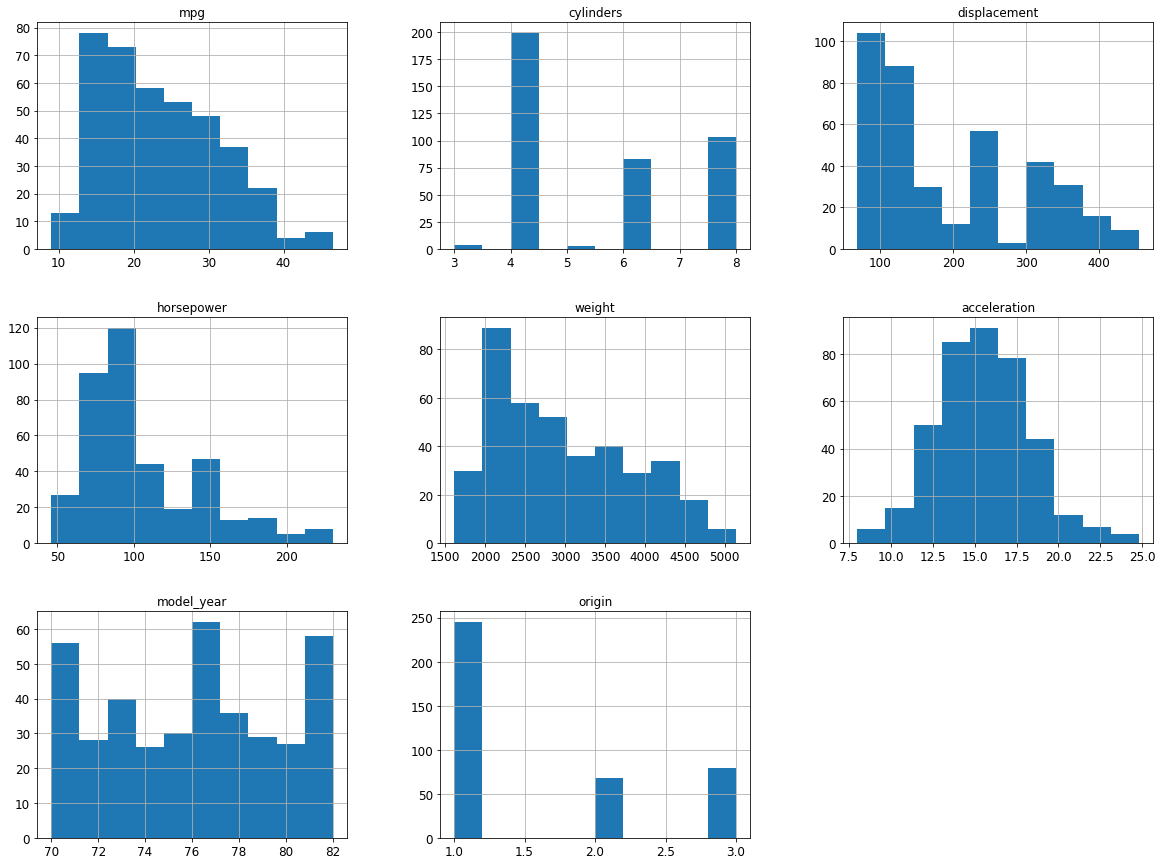

In [9]:
# Plot the histograms for all the features in the dataset

ampg_df.hist(bins=10, figsize=(20,15))
plt.show()

In [10]:
# To make this notebook's output identical at every run

np.random.seed(2)

In [11]:
# Plot correlation between mpg and other features

corr_matrix = ampg_df.corr()
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

In [12]:
# Split the dataframe into features and labels

X = ampg_df.drop(['mpg', 'car_name'], axis=1).values
y = ampg_df.loc[:, 'mpg'].values
print("X shape: ", X.shape, "y shape: ", y.shape)
print("Sample X values: ", X[:5], "\n", "Sample y values: ", y[:5])

X shape:  (392, 7) y shape:  (392,)
Sample X values:  [[8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00]] 
 Sample y values:  [18. 15. 18. 16. 17.]


In [13]:
# Split the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=2)
print(" X_train shape: ", X_train.shape,"\n", "y_train shape: ", y_train.shape,"\n",
     "X_val shape: ", X_val.shape,"\n", "y_val shape: ", y_val.shape,"\n",
     "X_test shape: ", X_test.shape,"\n", "y_test shape: ", y_test.shape,"\n")

 X_train shape:  (353, 7) 
 y_train shape:  (353,) 
 X_val shape:  (19, 7) 
 y_val shape:  (19,) 
 X_test shape:  (20, 7) 
 y_test shape:  (20,) 



In [14]:
# Model 1
# Sklearn Simple Linear Regression model with default parameters

from sklearn.linear_model import LinearRegression
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)
print("Train set score: ", lr_model_1.score(X_train, y_train))
print("Validation set score: ", lr_model_1.score(X_val, y_val))
print("Test set score: ", lr_model_1.score(X_test, y_test))

Train set score:  0.8259729074954911
Validation set score:  0.8738772538195761
Test set score:  0.6931648268439337


In [15]:
# Mean Squared Errors of train, validation and test set predictions

from sklearn.metrics import mean_squared_error
print("Train set mse: ", mean_squared_error(y_train, lr_model_1.predict(X_train)))
print("Validation set mse: ", mean_squared_error(y_val, lr_model_1.predict(X_val)))
print("Test set mse: ", mean_squared_error(y_test, lr_model_1.predict(X_test)))

Train set mse:  10.666806292792643
Validation set mse:  5.9872459023629006
Test set mse:  18.92267087524186


In [16]:
# Here the R^2 values and MSE values can be improved using more complex models

In [17]:
# Model 2
# Sklearn Simple Linear Regression model with normalized data

from sklearn.linear_model import LinearRegression
lr_model_2 = LinearRegression(normalize=True)
lr_model_2.fit(X_train, y_train)
print("Train set score: ", lr_model_2.score(X_train, y_train))
print("Validation set score: ", lr_model_2.score(X_val, y_val))
print("Test set score: ", lr_model_2.score(X_test, y_test))

Train set score:  0.8259729074954912
Validation set score:  0.8738772538195758
Test set score:  0.6931648268439331


In [18]:
# Here normalizing the data didn't made any difference, confirming that more complex models are required to fit the data